In [0]:
print("Hello World")

Hello World


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
plt.style.use('fivethirtyeight')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login (1).csv


In [0]:
log = pd.read_csv('Login.csv')

In [0]:
consumerKey = log['key'][2]
consumerSecret = log['key'][3]
accessToken = log['key'][0]
accessTokenSecret = log['key'][1]

In [0]:
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

authenticate.set_access_token(accessToken,accessTokenSecret)

api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [0]:
posts = api.user_timeline(screen_name="akshaykumar",count=100,lang="en",tweet_mode="extended")

for tweet in posts[0:5]:
    print(tweet.full_text+'\n')

RT @IPS_Association: As a mark of gratitude to the #IPS officer who helped bring her new born into the world in extremely adverse circumsta‚Ä¶

A great cause needs your support. Covid doesn‚Äôt stop periods, help provide sanitary pads to underprivileged women across Mumbai. Every donation counts : https://t.co/gty1PeX3CT https://t.co/CDgPkoGH82

This pandemic has only strengthened my belief that in times of crisis,it‚Äôs your family,your loved ones &amp; your home that always stands by you. In my home with my family,I always feel safe &amp; protected &amp; I am sure so do you.Aakhir Apna Ghar Apna hi hota hai. #ApnaGharApnaDesh @LODHA https://t.co/5QwTmytgkJ

RT @sonakshisinha: Bid for Good!
I have teamed up with @FankindOfficial to auction my art &amp; help raise funds to provide ration kits to dail‚Ä¶

Thank you @ajaydevgn...so my favourite films from the 90s would have to be Sangharsh and Andaz Apna Apna. I‚Äôm further tagging @ranveerofficial and @karanjohar to share theirs.  #90sl

In [0]:
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=["tweets"])
df.head()

tweets
0  RT @IPS_Association: As a mark of gratitude to...
1  A great cause needs your support. Covid doesn‚Äô...
2  This pandemic has only strengthened my belief ...
3  RT @sonakshisinha: Bid for Good!\nI have teame...
4  Thank you @ajaydevgn...so my favourite films f...

In [0]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S','',text)
  return text

df['tweets']=df['tweets'].apply(cleanText)

In [0]:
df

tweets  Subjectivity  Polarity
0   _Association: As a mark of gratitude to the IP...      0.727273  0.005682
1   A great cause needs your support. Covid doesn‚Äô...      0.750000  0.800000
2   This pandemic has only strengthened my belief ...      0.797222  0.425000
3   : Bid for Good!\nI have teamed up with  to auc...      0.600000  0.875000
4   Thank you ...so my favourite films from the 90...      0.500000  0.000000
..                                                ...           ...       ...
95  Anytime _khan , we‚Äôre all friends here üôÉ Prese...      0.454545  0.153409
96  Speechless,the world has lost a Legendary Athl...      0.625000  0.458333
97  Rain is predicted for today.\n\nYes, its going...      0.577778 -0.050000
98  Desi Police is coming on 27th March with lots ...      0.388889 -0.166667
99  The story continues with another melody... Fil...      0.000000  0.000000

[100 rows x 3 columns]

In [0]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
  
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df

tweets  Subjectivity  Polarity
0   _Association: As a mark of gratitude to the IP...      0.727273  0.005682
1   A great cause needs your support. Covid doesn‚Äô...      0.750000  0.800000
2   This pandemic has only strengthened my belief ...      0.797222  0.425000
3   : Bid for Good!\nI have teamed up with  to auc...      0.600000  0.875000
4   Thank you ...so my favourite films from the 90...      0.500000  0.000000
..                                                ...           ...       ...
95  Anytime _khan , we‚Äôre all friends here üôÉ Prese...      0.454545  0.153409
96  Speechless,the world has lost a Legendary Athl...      0.625000  0.458333
97  Rain is predicted for today.\n\nYes, its going...      0.577778 -0.050000
98  Desi Police is coming on 27th March with lots ...      0.388889 -0.166667
99  The story continues with another melody... Fil...      0.000000  0.000000

[100 rows x 3 columns]

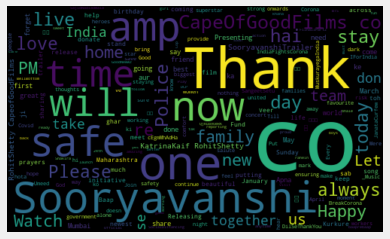

In [0]:
allWords = ' '.join([t for t in df['tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
def getAnalysis(score):
  if score>0:
    return 'Positive'
  elif score==0:
    return 'Neutral'
  else:
    return 'Negative'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

tweets  ...  Analysis
0   _Association: As a mark of gratitude to the IP...  ...  Positive
1   A great cause needs your support. Covid doesn‚Äô...  ...  Positive
2   This pandemic has only strengthened my belief ...  ...  Positive
3   : Bid for Good!\nI have teamed up with  to auc...  ...  Positive
4   Thank you ...so my favourite films from the 90...  ...   Neutral
..                                                ...  ...       ...
95  Anytime _khan , we‚Äôre all friends here üôÉ Prese...  ...  Positive
96  Speechless,the world has lost a Legendary Athl...  ...  Positive
97  Rain is predicted for today.\n\nYes, its going...  ...  Negative
98  Desi Police is coming on 27th March with lots ...  ...  Negative
99  The story continues with another melody... Fil...  ...   Neutral

[100 rows x 4 columns]

In [0]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+'.'+sortedDF['tweets'][i])
    print()
    j=j+1

1._Association: As a mark of gratitude to the IPS officer who helped bring her new born into the world in extremely adverse circumsta‚Ä¶

2.A great cause needs your support. Covid doesn‚Äôt stop periods, help provide sanitary pads to underprivileged women across Mumbai. Every donation counts : .co/gty1PeX3CT .co/CDgPkoGH82

3.This pandemic has only strengthened my belief that in times of crisis,it‚Äôs your family,your loved ones &amp; your home that always stands by you. In my home with my family,I always feel safe &amp; protected &amp; I am sure so do you.Aakhir Apna Ghar Apna hi hota hai. ApnaGharApnaDesh  .co/5QwTmytgkJ

4.: Bid for Good!
I have teamed up with  to auction my art &amp; help raise funds to provide ration kits to dail‚Ä¶

5.Everyday I hear incidents of bravery of our frontline workers who are putting fear &amp; exhaustion aside and putting us first. One such hero is our Maharashtra Police, I‚Äôm changing my DP to theirs as a mark of respect.Join in, together let‚Äôs sa

In [0]:
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+'.'+sortedDF['tweets'][i])
    print()
    j=j+1

1.Such terrible news...saddened to hear about the demise of IrrfanKhan, one of the finest actors of our time. May God give strength to his family in this difficult time üôèüèª

2.Name : Akshay Kumar
City : Mumbai 

Mere aur mere parivaar ki taraf se...
Police, Nagar Nigam ke workers, doctors, nurses, NGOs, volunteers, government officials, vendors, building ke guards ko DilSeThankYou üôèüèª .co/N8dnb4Na63

3.At the risk of sounding repetitive, sharing my thoughts...there is a lockdown for a reason. Please don‚Äôt be selfish and venture out, you‚Äôre putting others lives at risk üôèüèª
StayAtHomeSaveLives.  .co/G0Nms9hYoP

4.Joined these boys for a game of volleyball this morning at the beach. You don‚Äôt always need a gym to exercise, mix it up...it‚Äôs fun. .co/zwd3wQ0TW5

5.Rain is predicted for today.

Yes, its going to rain 6s.

Watch my team take on ‚Äôs team in Honda‚Äôs first ever Game of Sixes, today,6PM onwards, only on Star Sports.

GameOfSixes Activa6G 6ChangesTheGame 

Text(0, 0.5, 'Subjectivity')

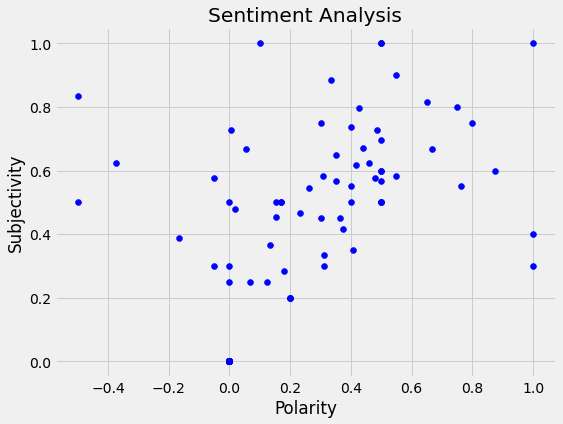

In [0]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [0]:
tweets_pos = df[df.Analysis=='Positive']
tweets_pos = tweets_pos['tweets']

tweets_pos

0     _Association: As a mark of gratitude to the IP...
1     A great cause needs your support. Covid doesn‚Äô...
2     This pandemic has only strengthened my belief ...
3     : Bid for Good!\nI have teamed up with  to auc...
5     Everyday I hear incidents of bravery of our fr...
6     Even in this day and age, you‚Äôre the only one ...
7     Wish you a very Happy birthday! Love and praye...
9     From our hearts to yours. Thank you for watchi...
10    We bring you India‚Äôs biggest at-home concert -...
11    It seems like we‚Äôre in the midst of a nightmar...
13    Thank you so much for making and sharing this,...
14    I salute  headconstables Chandrakant Pendurkar...
17    Looks like you‚Äôre totally enjoying yourself  a...
20    : ENJOY NOW -\nSangeetSetu with your favourite...
22    ThankYouDilSe  for being an integral part of t...
25    There‚Äôs an army of people working day and nigh...
28    Together we stand and together we will come ou...
29    Put your distress to rest. The

In [0]:
df.shape

(100, 4)

In [0]:
tweets_pos.shape

(57,)

In [0]:
round((tweets_pos.shape[0]/df.shape[0])*100,1)

57.0

In [0]:
tweets_neg = df[df.Analysis=='Negative']
tweets_neg = tweets_neg['tweets']

tweets_neg

12    Such terrible news...saddened to hear about th...
24    Name : Akshay Kumar\nCity : Mumbai \n\nMere au...
33    At the risk of sounding repetitive, sharing my...
92    Joined these boys for a game of volleyball thi...
97    Rain is predicted for today.\n\nYes, its going...
98    Desi Police is coming on 27th March with lots ...
Name: tweets, dtype: object

In [0]:
round((tweets_neg.shape[0]/df.shape[0])*100,1)

6.0

In [0]:
tweets_neut = df[df.Analysis=='Neutral']
tweets_neut = tweets_neut['tweets']

tweets_neut

4     Thank you ...so my favourite films from the 90...
8     Umeed hai sab theek hoga wapas,\nUmeed hai tum...
15                             ¬†¬†  CapeOfGoodFilms  _ ¬†
16    ‡§∏‡•Å‡§®‡§æ ‡§•‡§æ ‡§°‡•â‡§ï‡•ç‡§ü‡§∞‡•ç‡§∏ ‡§≠‡§ó‡§µ‡§® ‡§ï‡§æ ‡§∞‡•Ç‡§™ ‡§π‡•ã‡§§‡•á ‡§π‡•à ‡§≤‡•á‡§ï‡§ø‡§® ‡§ï‡•ã‡§∞...
18                            ¬†¬†¬†  CapeOfGoodFilms  _ ¬†
19    ‡§ï‡§ø‡§∏‡•Ä ‡§®‡•á ‡§∏‡§π‡•Ä ‡§ï‡§π‡§æ ‡§π‡•à, ‡§Æ‡•Å‡§∂‡•ç‡§ï‡§ø‡§≤ ‡§ï‡•á ‡§∏‡§Æ‡§Ø ‡§∏‡§ø‡§∞‡•ç‡§´ ‡§Ö‡§™‡§®‡•á ...
21    Privileged to host the stalwarts of Indian Mus...
23    ‡§∏‡§®‡•ç 1965 ‡§Æ‡•á‡§Ç ‡§Ü‡§ú ‡§ï‡•á ‡§¶‡§ø‡§® ‡§ñ‡•Å‡§¶ ‡§∏‡•á ‡§ï‡§à ‡§ó‡•Å‡§®‡§æ ‡§¨‡§°‡§º‡•Ä ‡§¶‡•Å‡§∂...
26    All we need is a united stand. Aur phir Muskur...
27    At a time like this when our days are clouded ...
30    This is that time when all that matters is the...
32    : GoodbyesAreGoodToo \n\nThe happiest moment f...
34                                    IndiaFightsCorona
35    5mins at 5pm :With my neighbours,taking a mome...
47 

In [0]:
round((tweets_neut.shape[0]/df.shape[0])*100,1)

37.0

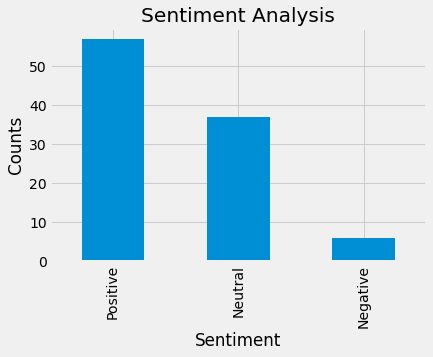

In [0]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()